In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.graphics.tsaplots as tsaplot

# TP N°12 : Séries Temporelles

## Q1

Importez les données du fichier Openhealth_S-Grippal.csv. Consultez http://www.openhealth.
fr/suivi-epidemiologique-temps-reel/ias-incidence-des-syndromes-grippaux pour plus
d’information sur les données. Affichez les 5 premières lignes du jeu de données. On va travailler
seulement avec la variable IAS_brut, sous la forme d’une série temporelle, dont on précisera la
fréquence d’échantillonage et les dates de début et de fin. Pour cette variable, dans ce jeu de don-
nées, les cas de nullité correspondent à des données manquantes. Combiende données manquantes
comporte-t-elle ? Pour les traitements des questions suivantes, éliminez les données manquantes par
imputation, c’est-à-dire en déduisant une valeur plus “raisonnable” aux dates non-observées à partir
des valeurs aux dates observées : par exemple par la moyenne de deux dates les plus proches.

In [73]:
df = pd.read_csv("OpenhealthS-Grippal.csv", sep = ';', infer_datetime_format = True, decimal=',')

# 5 premières lignes du jeu de données
df.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
0,2009-07-01,1.7,2.2,2.3
1,2009-07-02,3.4,2.1,2.3
2,2009-07-03,2.1,2.1,2.3
3,2009-07-04,1.3,2.0,2.3
4,2009-07-05,14.2,2.0,2.3


In [47]:
df.tail()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
1747,2014-04-13,77.9,1.8,NaN
1748,2014-04-14,2.7,1.7,NaN
1749,2014-04-15,1.0,1.6,NaN
1750,2014-04-16,1.6,1.6,NaN
1751,2014-04-17,0.4,1.6,NaN


**fréquence d'échantillonnage et dates de début et de fin**

- la fréquence d'échantillonnage est de **1 échantillon par jour** , ou 1/(24*60*60) Hz pour rester en unité SI
- **date de début** : 2009-07-01
- **date de fin** : 2014-04-17


In [64]:
# Données manquantes
len(df[df["IAS_brut"].isnull() == True])

"""Pour les traitements des questions suivantes, éliminez les données manquantes par
imputation, c’est-à-dire en déduisant une valeur plus “raisonnable” aux dates non-observées à partir
des valeurs aux dates observées : par exemple par la moyenne de deux dates les plus proches.
"""

'Pour les traitements des questions suivantes, éliminez les données manquantes par\nimputation, c’est-à-dire en déduisant une valeur plus “raisonnable” aux dates non-observées à partir\ndes valeurs aux dates observées : par exemple par la moyenne de deux dates les plus proches.\n'

In [63]:
df["IAS_brut"].isnull().sum()

#df['IAS_brut'].interpolate() interpolation pour les valeurs manquantes


0

## Q2  
Tracez la série temporelle considérée en fonction du temps. Commentez brièvement ce que vous observez.

In [71]:
df.dtypes

PERIODE                    int64
IAS_brut                 float64
IAS_lisse                float64
Incidence_Sentinelles    float64
dtype: object

In [74]:

df["PERIODE"] = pd.to_datetime(df["PERIODE"])

In [75]:
df["PERIODE"]

0      2009-07-01
1      2009-07-02
2      2009-07-03
3      2009-07-04
4      2009-07-05
          ...    
1747   2014-04-13
1748   2014-04-14
1749   2014-04-15
1750   2014-04-16
1751   2014-04-17
Name: PERIODE, Length: 1752, dtype: datetime64[ns]

<function matplotlib.pyplot.show(*args, **kw)>

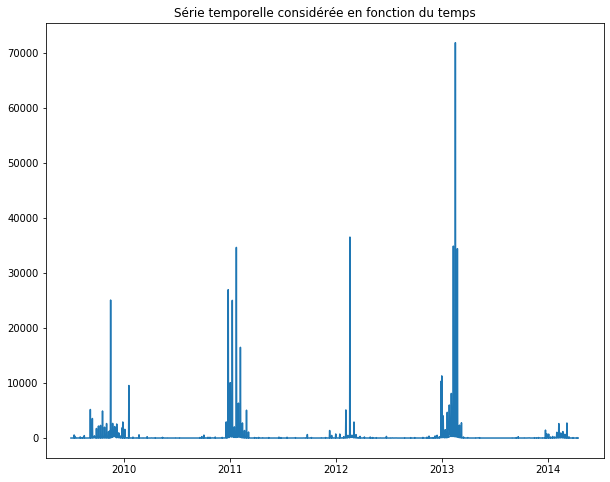

In [80]:
plt.figure(figsize = (10,8))
xvals = df["PERIODE"].to_numpy()
yvals =  df["IAS_brut"]
plt.plot(xvals, yvals)
plt.title ("Série temporelle considérée en fonction du temps")
plt.show

#plt.plot(df['PERIODE'].values, df['IAS_brut'].values)

## Q3
Tracez l’histogramme de la loi marginale. Quel impact la distribution observée par l’histogramme a sur la trajectoire représentée à la question précédente ?

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(df['IAS_brut'], bins=50)
plt.title("Histogramme de la loi marginale")
plt.show()

## Q4
Reprenez les questions précédentes après tranformations des observations par le logarithme naturel. Commentez.

In [ ]:
np.log(df['IAS_brut'])
#série temporelle considérée en fonction du temps


#histogramme de la loi marginale

## Q5
En utilisant **signal.perodogram()** (du package signal importé depuis scipy), tracez le périodo-
gramme des données. Expliquez les pics les plus significatifs que vous observez. Attention au fait
que dans la communauté signal les spectres sont normalisées pour des fréquences absolues dans
[−1/2, 1/2] plutôt que [−π, −π].

In [ ]:
f, Pxx_den = signal.periodogram(np.log(df['IAS_brut']))
plt.semilogy(f, Pxx_den)

## Q6
Pour supprimer une tendance périodique de période T dans un signal $(x_t)_{t \in Z}$ il suffit d’appliquer
le filtre $∆_T$ défini par
$$ [∆_T x] t = x_t − x_{t−T} $$
Utilisez cette méthode pour supprimer la tendance périodique de période 1 an. Quel pic du pério-
dogramme cette méthode a fait disparaître ?

In [86]:
periodogramme = []
T=365 # periode

for i in (365, range(len(df)-1)):
    delta_T = df['IAS_brut'][i] - df['IAS_brut'][i-T] 
    periodogramme.append(delta_T)

KeyError: range(0, 1751)

In [85]:
periodogramme

[-0.7, -2.7]

In [ ]:
plt.plot(periodogramme)

In [83]:
df['IAS_brut'][360] -df['IAS_brut'][365-5] 

0.0

## Q7
On vous propose un exercise de prédiction uniquement à partir de la tendance périodique. On va
prédire les valeurs de IAS_brut pour les dates du 1er avril 2013 au 17 avril 2014 en se basant
sur les observations précédentes (du 1er juillet 2009 au 31 mars 2013) pour estimer la tendance
périodique des données. Pour cela, pour un nombre d’harmoniques fixé (disons n_harm), construisez
les variables explicatives pour la période d’apprentissage : pour chaque k = 1, 2, ... n_harm, ajoutez deux variables explicatives, x i,2k−1 = cos(t i · k · 2π
T ) et x i,2k = sin(t i · k · T ), où t i est le moment
de temps (on peut utiliser les nombres entiers au lieu de dates) et T = 365. Estimez la tendance
périodique en régressant les données d’apprentissage sur ces variables explicatives.

Avec ce modèle linéaire, prédisez les valeurs du variable IAS_brut pour la période du 1er avril 2013
au 17 avril 2014.
Tracez les valeur de la série temporelle et votre prédiction pour l’ensemble de données (vous pouvez
utilisez les couleurs différentes pour pour les partie apprentissage et prédiction). Puis, donnez le
risque quadratique de la prédiction et tracez les résidus pour la période prédite.
Essayez les valeur de n_harm pour voir comment varie le risque quadratique de la prédiction.

In [ ]:
n_harm

for k in range(1, n_harm) :
    df['add_cos' + str(k)] = np.cos(df['index'] * k * 2 * math.pi / 365)
    #df['add_sin' + str(k)] = np.sin(df['index'] * k * 2 * math.pi / 365)

#df_train = df[df['PERIODE'] < "2013-03-31"].drop(['IAS_lissé', 'Incidence_Sentinelles'], adfis=1)
#df_test = df[df['PERIODE'] >= "2013-03-31"].drop(['IAS_lissé', 'Incidence_Sentinelles'], adfis=1)

#y_train = X_train['IAS_brut']
#X_train = X_train.drop(['IAS_brut', 'PERIODE'], axis=1)

OLS(y_train, X_train).fit()

y_test = X_test['IAS_brut']


risque_quadratique = sum((ytest-ypred)**2)
residus = ytest-ypred

In [ ]:
# Données "Trafic Internet"

## Q8
Importez les données du fichier lbl-tcp-3.tcp. Chaque ligne du tableau correspond à un paquet
et la première variable et le moment de sa transmission ; consultez http://ita.ee.lbl.gov/html/
contrib/LBL-TCP-3.html pour plus d’information sur les données. Affichez 5 premières lignes du
jeu de données.
Tout d’abord, créez la série temporelle, où chaque observation correspond au nombre de paquets
transmis dans un intervalle de 10 secondes. Il y a 720 intervalles, donc vous devez obtenir 720
observations.
Tracez la série temporelle obtenue.

In [ ]:
col_names = ["timestamp", "sourceHost", "destinationHost", "sourceTCPPort", "destinationTCPPort", "bytes"]

## Q9
Dans cette question on vous propose de construire un modèle auto-régressif AR(p). L’apprentissage
du modèle ne demande pas beaucoup de temps et s’effectue avec 1 − 2 ligne de code à l’aide
de la fonction ARIMA() importée de statsmodels.tsa.arima_model. Le choix du paramètre p
(d’une gamme de valeur prédéfinies, disons de 1 à p max ) est moins simple. On va aborder trois
possibilité : critère d’information d’Akaike (AIC), critère d’information bayésien (BIC) et validation
croisée/backtesting.
Le critères d’information AIC et BIC sont normalement implémentés dans le logiciel et sont donnés
directement après l’apprentissage du modèle. Pour faire la validation croisée pour une série, on la
coupe en n chunks chunks/folds et chaque foi utilise k premiers chunks pour entrainer le modèle et
le chunk numéro k + 1 pour le tester (par exemple regarder le risque quadratique) ; voir le dessin
ci-dessous.
Pour une gamme de valeur choisie, effectue les trois méthodes de la sélection du modèle.

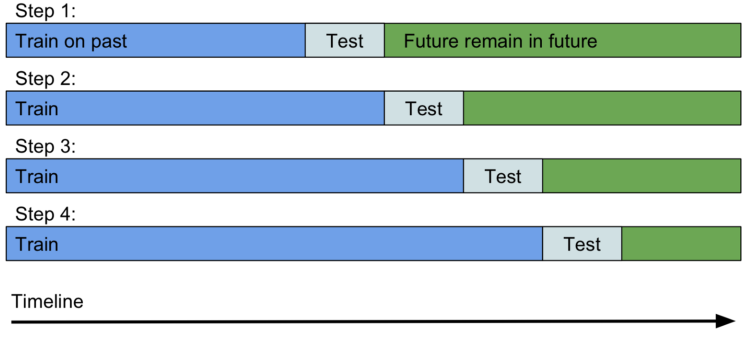

In [ ]:
df = df.set_index('time')


arima = ARIMA(df.loc[:500], order=(10,0,0))
arima = arima.fit()
#print(arima.summary())

# plot residual errors
residuals = pd.DataFrame(arima.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.loc[:500], label="Train")
plt.plot(df.loc[500:], label="Test")
plt.plot(arima.predict(start=500, end=700),label="Pred")
plt.legend()
plt.show()

In [ ]:

k = 0
mse_t = []
tot = len(df)
for i in range(1,number) :
    k = k + int(tot/number)
    model = ARIMA(df.loc[:k], order=(5,0,0))
    model_fit = model.fit()
    pred = model_fit.predict(start=k, end=tot)
    mse_t.append(mean_squared_error(pred, df.loc[k-1:]))

## Q10
En ce basant sur les résultats de la question précédente, sélectionnez l’ordre p du modèle AR à
estimer et affichez les paramètres correspondants.
Tracez les résidus. Tracez l’estimation de la densité de résidus et la densité de la distribution
normale (avec moyenne et écart-type estimés) sur le même graphique et comparez les visuellement.
Commentez.

In [ ]:

arima = ARIMA(df.loc[:500], order=(10,0,0))
arima = arima.fit()

# plot residual errors
residuals = pd.DataFrame(arima.resid)
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.show()


h = residuals.sort_values(0)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
residuals.plot(kind='kde')
plt.plot(h,fit,'-o')
plt.show()

# - Données “Southern oscillation index” -

## Q11
Importez les données du fichier soi.tsv. Consultez http://www.bom.gov.au/climate/glossary/
soi.shtml pour plus d’information sur les données. Supprimez les données manquantes.

In [ ]:
df = pd.read_csv("soi.tsv", delimiter="\t", header=None).T

#df.dropna()


## Q12
A l’aide des fonctions plot_acf() et plot_pacf() importées de statsmodels.graphics.tsaplots,
tracez la fonction d’autocorrélation et la fonction d’autocorrélation partielle.

In [ ]:
tsa.plot_acf(df);
tsa.plot_pacf(df);

## Q13
En ce basant sur la question précédente, choisissez l’ordre du processus auto-régressive AR(p).
Entrainer le modèle AR choisi. Tracez les résidus. Tracez l’estimation de la densité de résidus et la
densité de la distribution normale (avec moyenne et écart-type estimés) sur le même graphique et
comparez les visuellement. Commentez.

In [ ]:
#autocorrelation partielle significative jusque ordre 11

model = ARMA(df, order=(11,0))
result = model.fit()

# plot residual errors
residuals = pd.DataFrame(result.resid)
residuals.plot()

h = residuals.sort_values(0)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

residuals.plot(kind='kde')
plt.plot(h,fit,'-o')
plt.show()

## Q14

In [ ]:
plt.figure(figsize=(12,6))
f, Pxx_den = signal.periodogram(df[0])
plt.semilogy(f, Pxx_den)
plt.xlim([1e-10, 0.5])
plt.ylim([1e-3, 1e+2])
plt.show()